In [1]:
import numpy as np

In [2]:
T = [
    [[0.7, 0.3, 0.0], [1.0, 0.0, 0.0], [0.8, 0.2, 0.0]], #s0
    [[1.0, 0.0, 0.0], None,            [0.0, 0.0, 1.0]], #s1
    [None,            [0.8, 0.1, 0.1], None           ]  #s2
]
T_s0 = T[0]
T_s0

[[0.7, 0.3, 0.0], [1.0, 0.0, 0.0], [0.8, 0.2, 0.0]]

In [3]:
T_s0_a1 = T_s0[1]
T_s0_a1

[1.0, 0.0, 0.0]

In [4]:
R = [
    [[+10, 0, 0], [0, 0, 0],   [0, 0, 0]],   #s0
    [[0, 0, 0],   [0, 0, 0],   [0, 0, -50]], #s1
    [[0, 0, 0],   [+40, 0, 0], [0, 0, 0]]    #s2
]
R

[[[10, 0, 0], [0, 0, 0], [0, 0, 0]],
 [[0, 0, 0], [0, 0, 0], [0, 0, -50]],
 [[0, 0, 0], [40, 0, 0], [0, 0, 0]]]

In [5]:
num_of_states = 3
num_of_actions = 3
R = np.zeros((num_of_states, num_of_actions, num_of_states))
R[0][0][0] =  10
R[1][2][0] = -50
R[2][1][0] =  40
R

array([[[ 10.,   0.,   0.],
        [  0.,   0.,   0.],
        [  0.,   0.,   0.]],

       [[  0.,   0.,   0.],
        [  0.,   0.,   0.],
        [-50.,   0.,   0.]],

       [[  0.,   0.,   0.],
        [ 40.,   0.,   0.],
        [  0.,   0.,   0.]]])

In [6]:
possible_actions = [[0,1,2],[0,2],[1]] #stanje 1 ima akcije 0,1,2; stanje 2 0,2 itd.
Q_values = np.full((num_of_states,num_of_actions), -np.inf)
for state, actions in enumerate(possible_actions):
    Q_values[state, actions] = 0.0
Q_values

array([[  0.,   0.,   0.],
       [  0., -inf,   0.],
       [-inf,   0., -inf]])

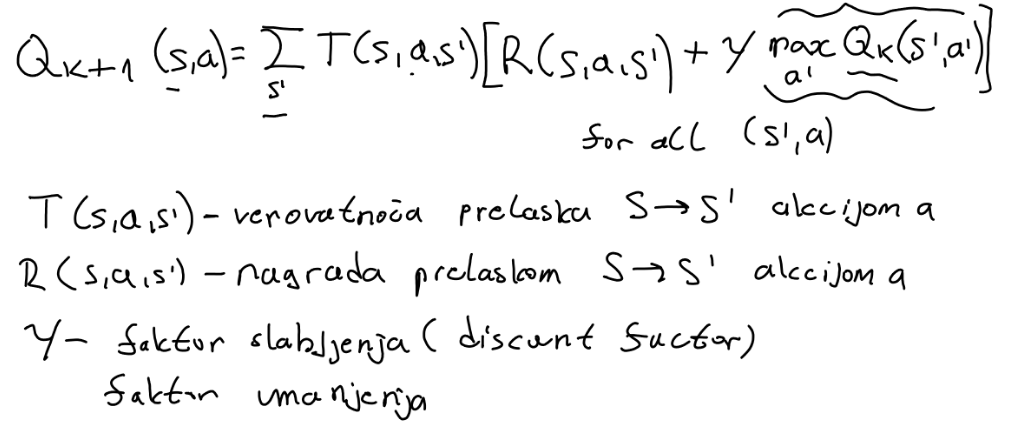

In [7]:
gamma = 0.98 #faktor umanjenja
num_of_iterations = 50
for iteration in range(num_of_iterations):
    Q_prev = Q_values.copy()
    for s in range(num_of_states):
        for a in possible_actions[s]:
            Q_values[s, a] = np.sum([
                T[s][a][sp]*(R[s][a][sp] + gamma*np.max(Q_prev[sp]))
                for sp in range(num_of_states)
            ])
print(Q_values)
optimal_action_in_state = np.argmax(Q_values, axis=1)
print(optimal_action_in_state)

[[344.6539858  333.72048336 336.34281832]
 [333.72048336         -inf 358.03324581]
 [        -inf 369.46292708         -inf]]
[0 2 1]


In [8]:
Q_values[0,1]

333.7204833554688

In [9]:
T = [
    [[0.7, 0.3, 0.0], [1.0, 0.0, 0.0], [0.8, 0.2, 0.0]], #s0
    [[1.0, 0.0, 0.0], None,            [0.0, 0.0, 1.0]], #s1
    [None,            [0.8, 0.1, 0.1], None           ]  #s2
]
R = [
    [[+10, 0, 0], [0, 0, 0],   [0, 0, 0]],   #s0
    [[0, 0, 0],   [0, 0, 0],   [0, 0, -50]], #s1
    [[0, 0, 0],   [+40, 0, 0], [0, 0, 0]]    #s2
]

In [10]:
def exploration_policy(state):
    return np.random.choice(possible_actions[state])
def step(state, action):
    p = T[state][action] # verovatnoca prelaska iz state u sva ostala stanja akcijom action
    next_state = np.random.choice([0,1,2], p=p)
    r = R[state][action][next_state]
    return next_state, r

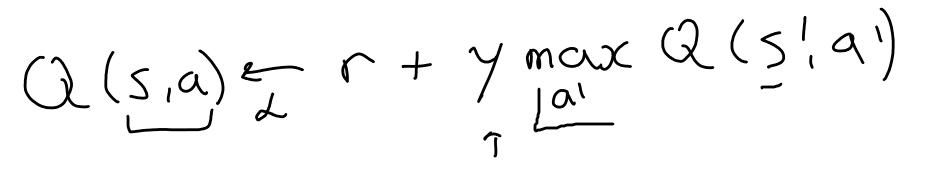

In [11]:
alpha0 = 0.05 # brzina ucenja
decay = 0.005 # umanjenje brzine ucenja
gamma = 0.98  # faktor umanjenja nagrade
state = 0

Q_values = np.full((num_of_states, num_of_actions), -np.inf)
# np.full pravi matricu velicine (num_of_states x num_of_actions) i postavlja vrednost na -inf
for state, action in enumerate(possible_actions):
    Q_values[state][action] = 0
    
num_of_iterations = 10000
for iteration in range(num_of_iterations):
    action = exploration_policy(state)
    next_state, reward = step(state, action)
    next_value = np.max(Q_values[next_state])
    alpha = alpha0 / (1 + iteration*decay)
    Q_values[state, action] *= 1 - alpha
    Q_values[state, action] += alpha * (reward + gamma*next_value)
    state = next_state
print(Q_values)
optimal_action_in_state = np.argmax(Q_values, axis = 1)
print(optimal_action_in_state)

[[36.89037775 33.35642734 31.21136705]
 [25.31927741        -inf -5.44019725]
 [       -inf 57.25256238        -inf]]
[0 0 1]


In [13]:
alpha0 = 0.05 # brzina ucenja
decay = 0.005 # umanjenje brzine ucenja
gamma = 0.98  # faktor umanjenja nagrade
state = 0

####
Q_values = np.full((num_of_states, num_of_actions), -np.inf)
for state, action in enumerate(possible_actions):
    Q_values[state][action] = 0
    
for iteration in range(10000):
    action = exploration_policy(state)
    next_state, reward = step(state, action)
    next_value = np.max(Q_values[next_state])
    alpha = alpha0 / (1 + iteration*decay)
    Q_values[state][action] = alpha0 / (1+iteration*decay)
    Q_values[state][action] = alpha * (reward + gamma*next_value)
    state = next_state

####
print(Q_values)
optimal_action_in_state = np.argmax(Q_values, axis = 1)
print(optimal_action_in_state)

[[36.89037775 33.35642734 31.21136705]
 [25.31927741        -inf -5.44019725]
 [       -inf 57.25256238        -inf]]
[0 0 1]
